<a href="https://colab.research.google.com/github/xilipkoru/xilipkoru/blob/main/05_Curado_de_bases_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curado de bases de datos

---

# Objetivos:

---
* Conocer las características adecuadas que deben presentar las moléculas para subsiguientes estudios in silico.
* Identificar las moléculas que pueden interferir en los cálculos computacionales.
* Llevar a cabo el curado de bases de datos utilizando módulos y funciones de `RDKit` y `Molvs`.

# Introducción
----

En modelado molecular y Quimioinformática se analizan con frecuencia bases de datos moleculares generadas por otros científicos, las cuales pueden contener información equivocada o innecesaria. Por lo tanto, el curado de base de datos de compuestos químicos es importante porque permite verificar la exactitud, consistencia, y reproducibilidad de los datos experimentales reportados, lo cual es crucial para evitar datos erróneos (Fourches D et al., 2016).

El curado de bases de datos consiste en:
* Eliminar moléculas repetidas.
Descartar moléculas inorgánicas y organometálicas si éstas no son el objeto de estudio central. Cabe mencionar que la mayoría de los programas de Quiomionformática actuales están desarrollados para procesar moléculas orgánicas pequeñas.
* "Lavado" de base de datos: antes de realizar una operación en una base de datos de moléculas, se recomienda aplicar a cada molécula un conjunto de reglas de limpieza tales como la eliminación de sales extrañas o el ajuste de los estados de protonación. Esto con el fin de asegurar que cada estructura estará en forma adecuada para el modelado subsiguiente (por ejemplo, visualización, enumeración de conformación y acoplamiento proteína-ligando).
* Optimización de la geometría mediante la minimización de energía: consiste en encontrar un conjunto de coordenadas atómicas que corresponden a un mínimo local de la función de energía molecular. Esto se hace con la aplicación de técnicas de optimización no lineales a gran escala para calcular una conformación (cercana a la geometría de partida), para la cual las fuerzas sobre los átomos son cero. La minimización de la energía es útil para la construcción de la molécula, la determinación de conformaciones de baja energía, la búsqueda conformacional y la preparación para las simulaciones de dinámica molecular y análisis de vibración.

La siguiente figura muestra el proceso de curado de bases de datos reportado por en Sánchez Cruz et al. (Sánchez Cruz et al. 2020)

Python script based on: Sánchez-Cruz N, Pilón-Jiménez BA and Medina-Franco JL. Functional group and diversity analysis of BIOFACQUIM: A Mexican natural product database. F1000Research 2020, 8(Chem Inf Sci):2071 DOI:[10.12688/f1000research.21540](https://doi.org/10.12688/f1000research.21540.2).                                                                        [GitHub](https://github.com/DIFACQUIM/IFG_General/blob/master/Compounds_Curation.py)  

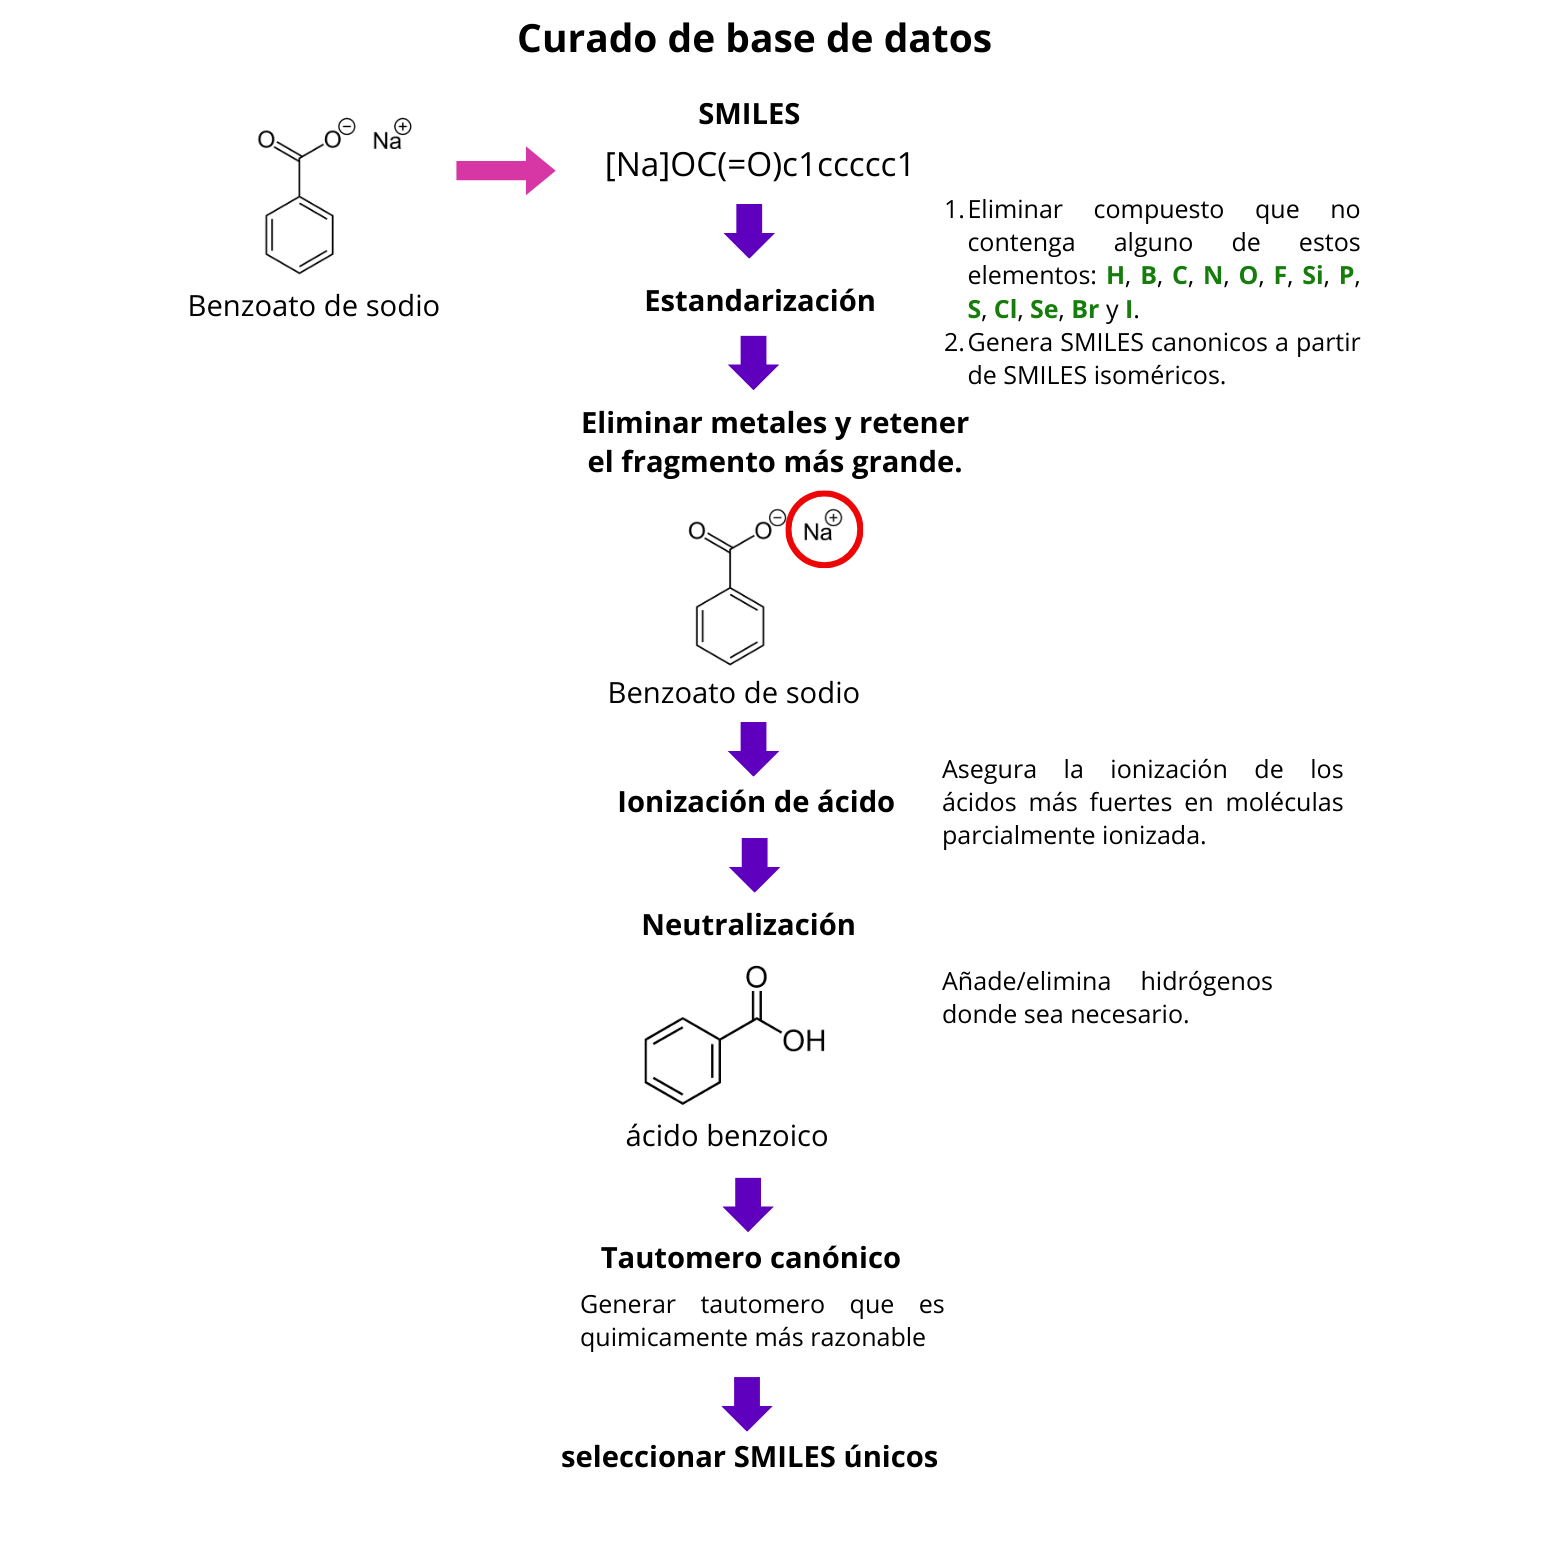

In [ ]:
!pip install -q rdkit

In [ ]:
!pip install -q molvs

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from molvs.standardize import Standardizer
from molvs.charge import Uncharger, Reionizer
from molvs.fragment import LargestFragmentChooser
from molvs.tautomer import TautomerCanonicalizer
from rdkit.Chem.rdmolops import GetFormalCharge, RemoveStereochemistry

In [ ]:
#DNMT1
url_dnmt1 = "https://drive.google.com/file/d/1j4kC42s4SM-JtaIrVF9M7p-dHfLYJfgj/view?usp=sharing"
url_dnmt1='https://drive.google.com/uc?id=' + url_dnmt1.split('/')[-2]
DNMT1 = pd.read_csv(url_dnmt1)
DNMT1.head(2)  # Muestra las dos primeras filas de información, para corroborar que cargó la información correctamente

"Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
0      "CHEMBL2336409           NaN                   0            461.53   
1      "CHEMBL1916683           NaN                   0            261.28   

   #RO5 Violations  AlogP                                             Smiles  \
0                1   5.65  Cc1cc(Nc2ccc(NC(=O)c3ccc(Nc4ccnc5ccccc45)cc3)c...   
1                0   1.45            CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1   

  Standard Type Standard Relation  Standard Value Standard Units  \
0          IC50               '='         11220.0             nM   
1          IC50               '='        310000.0             nM   

   pChEMBL Value  
0           4.95  
1            NaN

In [ ]:
set(list(DNMT1["Molecule Name"]))

{'AZACITIDINE',
 'BENZANTHRONE',
 'CEPHALOTHIN',
 'DAPHNORIN',
 'DECITABINE',
 'Dichlon',
 'EPIGALOCATECHIN GALLATE',
 'GENISTEIN',
 'PROCAINAMIDE',
 'PSAMMAPLIN A',
 'S-ADENOSYLHOMOCYSTEINE',
 'VORINOSTAT',
 nan}

In [ ]:
print(DNMT1.columns)

Index(['"Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Smiles',
       'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value'],
      dtype='object')


In [ ]:
#Select SMILES_chiral column
DNMT1 = DNMT1[['"Molecule ChEMBL ID',"Smiles",'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value']]
DNMT1

"Molecule ChEMBL ID                                             Smiles  \
0        "CHEMBL2336409  Cc1cc(Nc2ccc(NC(=O)c3ccc(Nc4ccnc5ccccc45)cc3)c...   
1        "CHEMBL1916683            CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1   
2        "CHEMBL3109075  O=C(O)[C@@H]1[C@H](Cc2c[nH]c3ccccc23)CCN1C(=O)...   
3        "CHEMBL3109080     O=C(O)[C@H](Cc1csc2ccccc12)N1C(=O)c2ccccc2C1=O   
4        "CHEMBL3126645  Cc1cc(Nc2ccc(NC(=O)c3cccc(Nc4ccnc5ccccc45)c3)c...   
..                  ...                                                ...   
466      "CHEMBL4866673  COc1cc2c(NCc3ccc(-c4ccc(C(=O)NO)cc4)cc3)cc(-c3...   
467      "CHEMBL4871621  COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...   
468      "CHEMBL4878570  O=C(NO)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...   
469      "CHEMBL4454542  COc1cc2c(cc1OCCCN1CCCC1)N=C(C1CCCCC1)CN=C2NC1C...   
470      "CHEMBL1231795  COc1cc2c(NC3CCN(C(C)C)CC3)nc(C3CCCCC3)nc2cc1OC...   

    Standard Type Standard Relation  Standard Value Standard Units  \
0            IC50               '='         11220.0             nM   
1            IC50               '='        310000.0             nM   
2            IC50               '='        128000.0             nM   
3            IC50               '='        230000.0             nM   
4            IC50               '='        265000.0             nM   
..            ...               ...             ...            ...   
466          IC50               '='          2570.0             nM   
467          IC50               '>'            10.0             nM   
468          IC50               '='          2020.0             nM   
469          IC50               '='          3100.0             nM   
470          IC50               '='        107000.0             nM   

     pChEMBL Value  
0             4.95  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
..             ...  
466           5.59  
467            NaN  
468           5.70  
469           5.51  
470            NaN  

[471 rows x 7 columns]

In [ ]:
DNMT1.columns = ['Molecule ChEMBL ID',"Smiles",'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value']

In [ ]:
DNMT1

Molecule ChEMBL ID                                             Smiles  \
0       "CHEMBL2336409  Cc1cc(Nc2ccc(NC(=O)c3ccc(Nc4ccnc5ccccc45)cc3)c...   
1       "CHEMBL1916683            CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1   
2       "CHEMBL3109075  O=C(O)[C@@H]1[C@H](Cc2c[nH]c3ccccc23)CCN1C(=O)...   
3       "CHEMBL3109080     O=C(O)[C@H](Cc1csc2ccccc12)N1C(=O)c2ccccc2C1=O   
4       "CHEMBL3126645  Cc1cc(Nc2ccc(NC(=O)c3cccc(Nc4ccnc5ccccc45)c3)c...   
..                 ...                                                ...   
466     "CHEMBL4866673  COc1cc2c(NCc3ccc(-c4ccc(C(=O)NO)cc4)cc3)cc(-c3...   
467     "CHEMBL4871621  COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...   
468     "CHEMBL4878570  O=C(NO)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...   
469     "CHEMBL4454542  COc1cc2c(cc1OCCCN1CCCC1)N=C(C1CCCCC1)CN=C2NC1C...   
470     "CHEMBL1231795  COc1cc2c(NC3CCN(C(C)C)CC3)nc(C3CCCCC3)nc2cc1OC...   

    Standard Type Standard Relation  Standard Value Standard Units  \
0            IC50               '='         11220.0             nM   
1            IC50               '='        310000.0             nM   
2            IC50               '='        128000.0             nM   
3            IC50               '='        230000.0             nM   
4            IC50               '='        265000.0             nM   
..            ...               ...             ...            ...   
466          IC50               '='          2570.0             nM   
467          IC50               '>'            10.0             nM   
468          IC50               '='          2020.0             nM   
469          IC50               '='          3100.0             nM   
470          IC50               '='        107000.0             nM   

     pChEMBL Value  
0             4.95  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
..             ...  
466           5.59  
467            NaN  
468           5.70  
469           5.51  
470            NaN  

[471 rows x 7 columns]

In [ ]:
#Select five compounds
#DNMT1 = DNMT1.iloc[:5,:]
DNMT1.shape

(471, 7)

In [ ]:
# Define functions
STD = Standardizer() # Get the standardized version of a given SMILES string (canonical SMILES).
LFC = LargestFragmentChooser() # Select the largest fragment from a salt (ionic compound).
UC = Uncharger() # Charge corrections are applied to ensure, for example, that free metals are correctly ionized.
RI = Reionizer() # Neutralize molecule by adding/removing hydrogens.
TC = TautomerCanonicalizer()  # Return a tautormer “reasonable” from a chemist’s point, but isn’t guaranteed to be the most energetically favourable.

In [ ]:
def pretreatment(notations):
    try:
        mol = Chem.MolFromSmiles(notations)
        if mol == None:
            #If rdkit could not parse the smiles, returns Error 1
            return "Error 1"
        else:
            mol = STD(mol)
            mol = LFC(mol)

            allowed_elements = {"H","B","C","N","O","F","Si","P","S","Cl","Se","Br","I"}
            actual_elements = set([atom.GetSymbol() for atom in mol.GetAtoms()])
            if len(actual_elements-allowed_elements) == 0:
                mol = UC(mol)
                mol = RI(mol)
                RemoveStereochemistry(mol)
                mol = TC(mol)
                return Chem.MolToSmiles(mol)
            else:
                # If molecule contains other than the allowed elements, return "Error 2"
                return "Error 2"
    except:
        return "Nope"

In [ ]:
DNMT1["Smiles standarization"] = [pretreatment(i) for i in DNMT1["Smiles"]]
DNMT1

In [ ]:
# Delate smiles that rdkit could not read
DNMT1 = DNMT1[DNMT1["Smiles standarization"] != "Error 1"]
# Delate smiles that no contain allowed atoms
DNMT1 = DNMT1[DNMT1["Smiles standarization"] != "Error 2"]
# Delate other errors
DNMT1 = DNMT1[DNMT1["Smiles standarization"] != "Nope"].reset_index(drop=True)

In [ ]:
# Delete duplicates
DNMT1 = DNMT1.drop_duplicates(subset=["Smiles standarization"], keep="first").reset_index(drop=True)
DNMT1

In [ ]:
# Delete rows with NaN (Not a Number) and None values from pandas DataFrame.
DNMT1 = DNMT1.dropna()

In [ ]:
DNMT1

In [ ]:
DNMT1.to_csv("DNMT1_curada.csv", sep=",", index=False)

# Para saber más:

* Sánchez-Cruz N, Pilón-Jiménez BA and Medina-Franco JL. (2020) [Functional group and diversity analysis of BIOFACQUIM: A Mexican natural product database.](https://f1000researchdata.s3.amazonaws.com/manuscripts/27062/82ff2f5c-e42a-4ee4-8b6c-908f2dcfbadb_21540_-_jose_l_medina-franco_v2.pdf?doi=10.12688/f1000research.21540.2&numberOfBrowsableCollections=86&numberOfBrowsableInstitutionalCollections=4&numberOfBrowsableGateways=49) F1000Research, 8(Chem Inf Sci):2071 DOI:10.12688/f1000research.21540.